In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

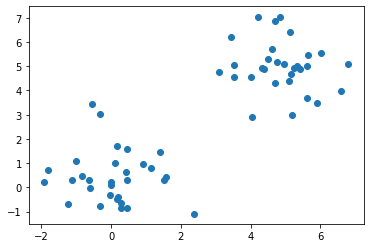

In [2]:
sample = [np.random.randn(2) for _ in range(30)]
for _ in range(30):
    sample.append(np.random.randn(2)+np.array([5,5]))
    
sample = np.array(sample)
plt.scatter(sample[:,0],sample[:,1])
plt.show()

In [0]:
def get_distance(p1, p2):
  return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [0]:
def clustering(centroid,sample):
  label = []
  for s in sample:
    dist = [get_distance(s,c) for c in centroid]
    label.append(dist.index(min(dist)))
  return label

In [0]:
def get_error(centroid,sample,label):
  err = 0
  for i, v in enumerate(sample):
    err += get_distance(v,centroid[label[i]])
  return err


In [0]:
def get_centroid(sample,label):
  s1=[]
  s2=[]
  for i in range(len(label)):
    if label[i] == 0:
      s1.append(sample[i])
    else :
      s2.append(sample[i])
  s1=np.array(s1)
  s2=np.array(s2)
  return np.array([(np.mean(s1[:,0]),np.mean(s1[:,1])),(np.mean(s2[:,0]),np.mean(s2[:,1]))])

In [0]:
centroid = np.array([(0,6) , (6,0)])
label = clustering(centroid,sample)
err = get_error(centroid,sample,label)

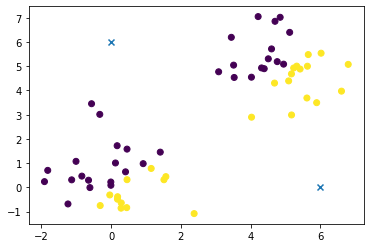

In [8]:
plt.scatter(sample[:,0],sample[:,1], c=label)
plt.scatter(centroid[:,0],centroid[:,1], marker='x')
plt.show()

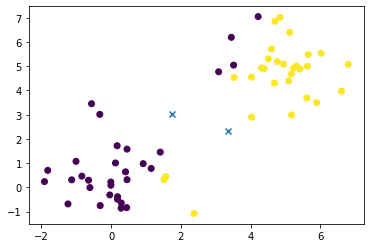

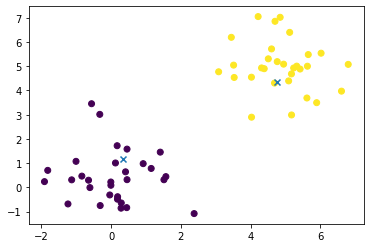

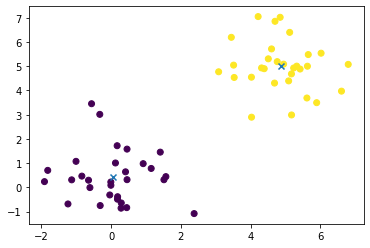

In [9]:
for i in range(5):
  new_centroid = get_centroid(sample,label)
  label = clustering(new_centroid,sample)
  new_err = get_error(new_centroid,sample,label)
  if new_err < err:
    err = new_err
    centroid = new_centroid
  else :
    break
  plt.scatter(sample[:,0],sample[:,1], c=label)
  plt.scatter(centroid[:,0],centroid[:,1], marker='x')
  plt.show()